In [1]:
import pandas as pd

In [3]:
ts=pd.read_csv(r"C:\Users\Amrita\Downloads\TSLA (3).csv")

In [4]:
ts

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-03-08,600.549988,620.130005,558.789978,563.000000,563.000000,51787000
1,2021-03-09,608.179993,678.090027,595.210022,673.580017,673.580017,67523300
2,2021-03-10,700.299988,717.849976,655.059998,668.059998,668.059998,60605700
3,2021-03-11,699.400024,702.500000,677.179993,699.599976,699.599976,36253900
4,2021-03-12,670.000000,694.880005,666.140015,693.729980,693.729980,33583800
...,...,...,...,...,...,...,...
247,2022-02-28,815.010010,876.859985,814.710022,870.429993,870.429993,33002300
248,2022-03-01,869.679993,889.880005,853.780029,864.369995,864.369995,24922300
249,2022-03-02,872.130005,886.479980,844.270020,879.890015,879.890015,24881100
250,2022-03-03,878.770020,886.440002,832.599976,839.289978,839.289978,20373300


In [5]:
from sklearn.model_selection import train_test_split

In [6]:
ts= ts.drop('Date', axis=1)

In [8]:
ts= ts.drop('Adj Close', axis=1)

In [9]:
ts

,Open,High,Low,Close,Volume
0,600.549988,620.130005,558.789978,563.000000,51787000
1,608.179993,678.090027,595.210022,673.580017,67523300
2,700.299988,717.849976,655.059998,668.059998,60605700
3,699.400024,702.500000,677.179993,699.599976,36253900
4,670.000000,694.880005,666.140015,693.729980,33583800
...,...,...,...,...,...
247,815.010010,876.859985,814.710022,870.429993,33002300
248,869.679993,889.880005,853.780029,864.369995,24922300
249,872.130005,886.479980,844.270020,879.890015,24881100
250,878.770020,886.440002,832.599976,839.289978,20373300


In [12]:
X = ts.iloc[:, ts.columns!='Close']

In [13]:
y=ts.Close

In [14]:
type(X), type(y)

(pandas.core.frame.DataFrame, pandas.core.series.Series)

In [15]:
train_X, test_X, train_y, test_y = train_test_split(X,y, test_size = 0.3)

In [18]:
train_X.shape, train_y.shape

((176, 4), (176,))

In [19]:
test_X.shape, test_y.shape

((76, 4), (76,))

In [20]:
from sklearn.linear_model import LinearRegression

In [21]:
lr = LinearRegression()

In [22]:
lr.fit(train_X, train_y)

LinearRegression()

In [38]:
lr.coef_

array([-7.61769884e-01,  9.13789521e-01,  8.44090951e-01, -6.71678080e-08])

In [39]:
lr.intercept_

4.487286491134455

In [24]:
y_hat = lr.predict(test_X)

In [25]:
y_hat.shape,  test_y.shape

((76,), (76,))

In [27]:
sum(test_y-y_hat)

-2.7470332168231835

In [28]:
import matplotlib.pyplot as plt

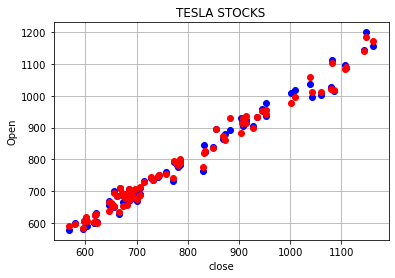

In [37]:
fig = plt.figure()
ax =plt.axes()
ax.grid()
ax.set(xlabel = 'close' , ylabel = 'Open', title='TESLA STOCKS')

ax.plot(test_X['Open'], test_y, 'bo')
ax.plot(test_X['Open'], y_hat, 'ro')

fig.savefig("E:\\Python\\linreg_plot.png")
plt.show()

In [40]:
from sklearn import metrics

In [42]:
metrics.mean_absolute_error(test_y ,y_hat)

8.840931920789885

In [44]:
metrics.mean_squared_error(test_y ,y_hat)

156.30061214650502

In [45]:
metrics.r2_score(test_y ,y_hat)

0.9940798519489232